In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
boston = load_boston()
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [14]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
target = pd.DataFrame(boston.target, columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
X, y = load_boston(return_X_y=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

In [19]:
clf = RandomForestRegressor(max_depth= 3, n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [20]:
target_pred = clf.predict(X_test)
print('Predicción: ', target_pred)
print('Real:       ', y_test)

Predicción:  [16.29245143 10.00921703 15.09109433 14.02626593 23.35859689 21.9799359
 24.89951606 16.29245143 30.53699825 18.78536468 24.89951606 28.64136607
 10.67603522 23.35859689 10.00921703 23.35859689 15.21542631 18.58571321
 25.0323279  23.35859689 16.29245143 35.11236632 21.9799359  21.42227681
 28.02154049 21.9799359  21.9799359  23.35859689 10.67603522 31.13811468
 10.00921703 24.11947076 10.00921703 21.9799359  23.99513113 30.53699825
 23.35859689 12.7177398  15.20339563 23.35859689 10.67603522 14.02626593
 30.53699825 14.56624481 24.26298182 21.34247872 17.8803638  16.29245143
 23.99513113 21.9799359  14.02626593 32.0424996  16.29245143 14.02626593
 23.35859689 21.9799359  23.35859689 14.56624481 23.35859689 21.9799359
 16.29245143 15.62239444 43.5077555  21.9799359  15.09109433 23.35859689
 23.99513113 10.00921703 16.29245143 24.89951606 22.81973347 17.21030681
 16.29245143 27.39046063 21.34247872 42.65926397 15.73901073 10.00921703
 16.94163293 23.35859689 21.9799359  16.

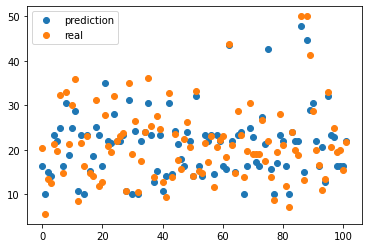

In [21]:
plt.plot(target_pred, 'o', label = 'prediction')
plt.plot(y_test, 'o', label = 'real')
plt.legend()
plt.show()

In [22]:
mean_squared_error(y_test, target_pred)

19.590835916975642

In [23]:
def model_sel(X, y):
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (100, 500, 1000, 2000),
        }, cv=5, scoring='neg_mean_squared_error')
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                n_estimators=best_params["n_estimators"],
                                random_state=0).fit(X,y)
    return (rfr, best_params)

In [24]:
model, best_params = model_sel(X_train, y_train)

In [38]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
for i in range(3,7):
  print(i)

3
4
5
6


In [37]:
best_params

{'max_depth': 6, 'n_estimators': 500}

In [27]:
target_pred_2 = model.predict(X_test)

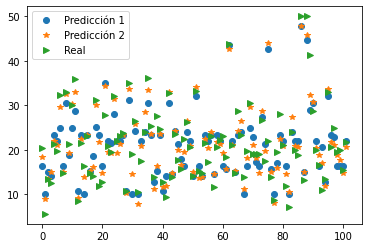

In [28]:
plt.plot(target_pred, 'o', label = 'Predicción 1')
plt.plot(target_pred_2, '*', label = 'Predicción 2')
plt.plot(y_test, '>', label = 'Real')
plt.legend()
plt.show()

In [29]:
mean_squared_error(y_test, target_pred_2)

12.966453916148538

In [30]:
mean_squared_error(y_test, target_pred)

19.590835916975642

In [31]:
r2_score(y_test, target_pred_2)

0.8189914130386047

In [32]:
dtr = DecisionTreeRegressor(max_depth= 3, random_state=0)
dtr.fit(X_train, y_train)
target_pred3 = dtr.predict(X_test)

In [33]:
mean_squared_error(y_test, target_pred3)

28.011217287136695